<a href="https://colab.research.google.com/github/Viveksaindane31/Analytics-QA-Engineer-Intern---Technical-Project-Brief/blob/main/Technical_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly.express as px

# Response time anomaly chart
fig = px.line(response_trends, title="Response Time Anomalies")
fig.add_scatter(x=anomalies.index, y=anomalies, mode='markers', name='Anomalies', marker=dict(color='red'))
fig.show()

# Error rate anomaly chart
fig = px.line(error_rate, title="Error Rate Anomalies")
fig.add_scatter(x=error_anomalies.index, y=error_anomalies, mode='markers', name='Anomalies', marker=dict(color='red'))
fig.show()


In [ ]:
# Calculate error rate per endpoint
endpoint_error_rate = data.groupby('endpoint')['is_error'].mean() * 100

# Set a threshold for persistent failures (e.g., error rate > 50%)
failed_endpoints = endpoint_error_rate[endpoint_error_rate > 50]

print("Endpoints with persistent failures:")
print(failed_endpoints)


Endpoints with persistent failures:
Series([], Name: is_error, dtype: float64)


In [ ]:
# Count requests per endpoint per hour
endpoint_availability = data.groupby(['endpoint', pd.Grouper(key='timestamp', freq='H')])['user_id'].count().unstack()

# Find endpoints with zero requests in any time interval
unavailable_endpoints = endpoint_availability[endpoint_availability.isnull().any(axis=1)]

print("Endpoints with availability issues:")
print(unavailable_endpoints)


Endpoints with availability issues:
timestamp             2024-12-01 23:00:00  2024-12-02 00:00:00  \
endpoint                                                         
/api/chat                             3.0                  1.0   
/api/recommendations                  2.0                  4.0   
/api/search                           3.0                  6.0   
/api/user/profile                     NaN                  1.0   

timestamp             2024-12-02 01:00:00  2024-12-02 02:00:00  \
endpoint                                                         
/api/chat                             3.0                  3.0   
/api/recommendations                  4.0                  3.0   
/api/search                           NaN                  3.0   
/api/user/profile                     5.0                  3.0   

timestamp             2024-12-02 03:00:00  2024-12-02 04:00:00  \
endpoint                                                         
/api/chat                             

<ipython-input-20-ca3e45b72b7c>:2: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



<ipython-input-19-4bf2da449933>:4: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



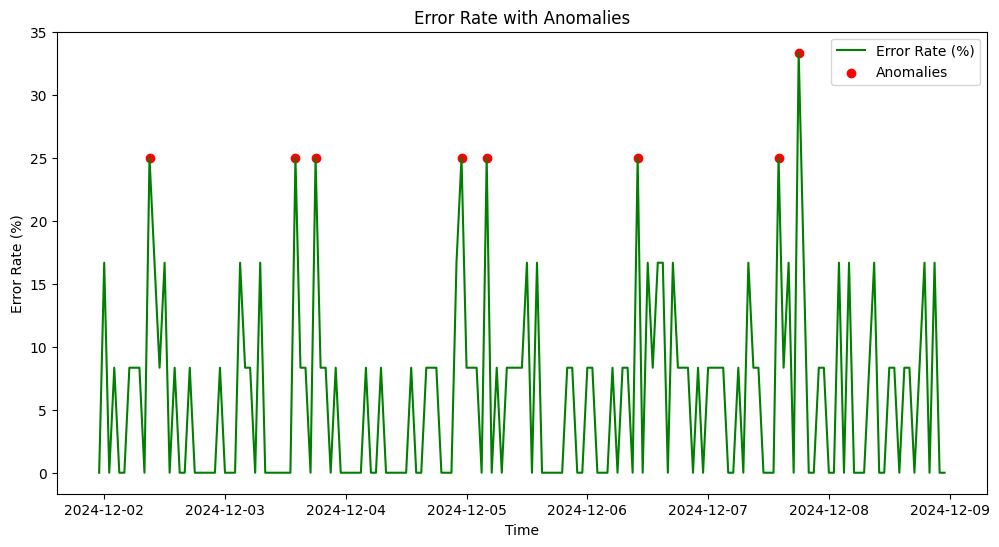

In [ ]:
import numpy as np

# Calculate error rate over time
error_rate = data.resample('H', on='timestamp')['is_error'].mean() * 100

# Calculate z-scores
z_scores = (error_rate - error_rate.mean()) / error_rate.std()

# Define an anomaly threshold (e.g., z-score > 2 or < -2)
error_anomalies = error_rate[np.abs(z_scores) > 2]

# Plot error rate with anomalies
plt.figure(figsize=(12, 6))
plt.plot(error_rate, label='Error Rate (%)', color='green')
plt.scatter(error_anomalies.index, error_anomalies, color='red', label='Anomalies')
plt.title("Error Rate with Anomalies")
plt.xlabel("Time")
plt.ylabel("Error Rate (%)")
plt.legend()
plt.show()


<ipython-input-18-10304bed2ec3>:2: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



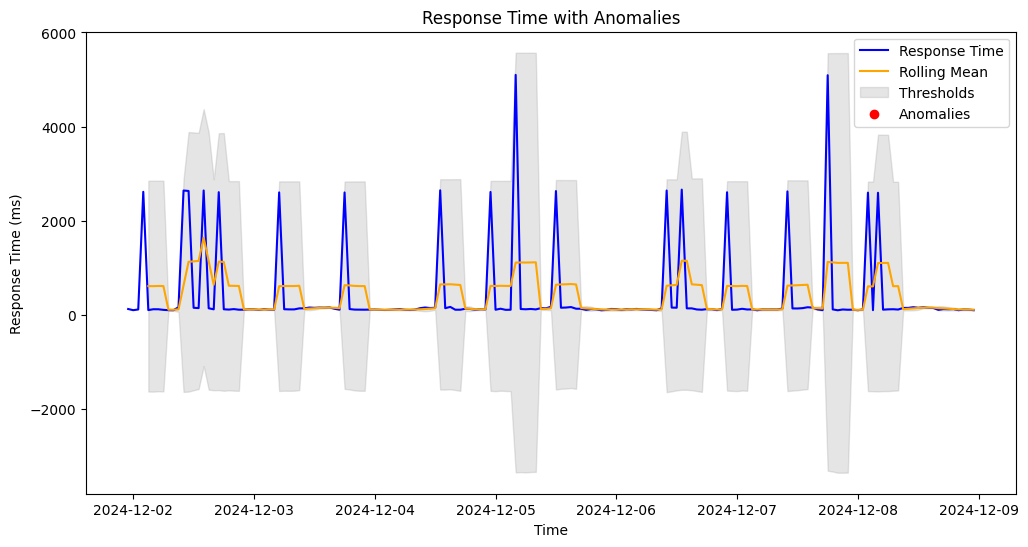

In [ ]:
# Aggregate response time by hour
response_trends = data.resample('H', on='timestamp')['response_time_ms'].mean()

# Calculate rolling mean and standard deviation
rolling_mean = response_trends.rolling(window=5).mean()
rolling_std = response_trends.rolling(window=5).std()

# Define anomaly thresholds (e.g., 2 standard deviations from the mean)
upper_threshold = rolling_mean + 2 * rolling_std
lower_threshold = rolling_mean - 2 * rolling_std

# Identify anomalies
anomalies = response_trends[(response_trends > upper_threshold) | (response_trends < lower_threshold)]

# Plot response time with anomalies
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(response_trends, label='Response Time', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.fill_between(rolling_mean.index, upper_threshold, lower_threshold, color='gray', alpha=0.2, label='Thresholds')
plt.scatter(anomalies.index, anomalies, color='red', label='Anomalies')
plt.title("Response Time with Anomalies")
plt.xlabel("Time")
plt.ylabel("Response Time (ms)")
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = "app_logs.xlsx"  # Replace with your file path
data = pd.read_excel(file_path)

# Convert 'timestamp' to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Create a new column to flag errors
data['is_error'] = data['status_code'] != 200

# Preview the data
print(data.head())


            timestamp              endpoint  user_id  response_time_ms  \
0 2024-12-01 23:20:31           /api/search  user_25                98   
1 2024-12-01 23:25:31  /api/recommendations  user_82               107   
2 2024-12-01 23:30:31             /api/chat  user_89               147   
3 2024-12-01 23:35:31           /api/search  user_12                96   
4 2024-12-01 23:40:31           /api/search  user_15                98   

   status_code  is_error  
0          200     False  
1          200     False  
2          200     False  
3          200     False  
4          200     False  


In [ ]:
pip install pandas openpyxl matplotlib seaborn plotly numpy


In [ ]:
import plotly.express as px

# Interactive response time trends
fig = px.line(response_trends, title="Response Time Trends", labels={'value': 'Response Time (ms)', 'index': 'Time'})
fig.show()

# Interactive error rate
fig = px.line(error_rate, title="Error Rate Patterns", labels={'value': 'Error Rate (%)', 'index': 'Time'})
fig.show()

# Interactive bar chart for endpoint performance
fig = px.bar(endpoint_performance, title="Endpoint Performance", labels={'index': 'Endpoint', 'value': 'Avg Response Time (ms)'})
fig.show()


<ipython-input-14-5b8af82491df>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  usage_trends = data.resample('H', on='timestamp')['user_id'].count()


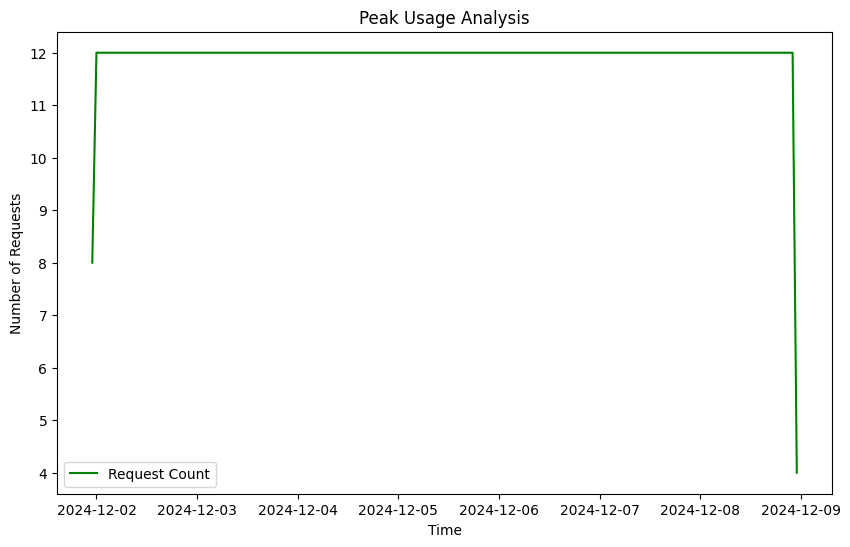

In [ ]:
# Count requests per time interval
usage_trends = data.resample('H', on='timestamp')['user_id'].count()

# Plot peak usage
plt.figure(figsize=(10, 6))
plt.plot(usage_trends, label='Request Count', color='green')
plt.title("Peak Usage Analysis")
plt.xlabel("Time")
plt.ylabel("Number of Requests")
plt.legend()
plt.show()


<ipython-input-13-2128025748b3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=endpoint_performance.index, y=endpoint_performance.values, palette='viridis')


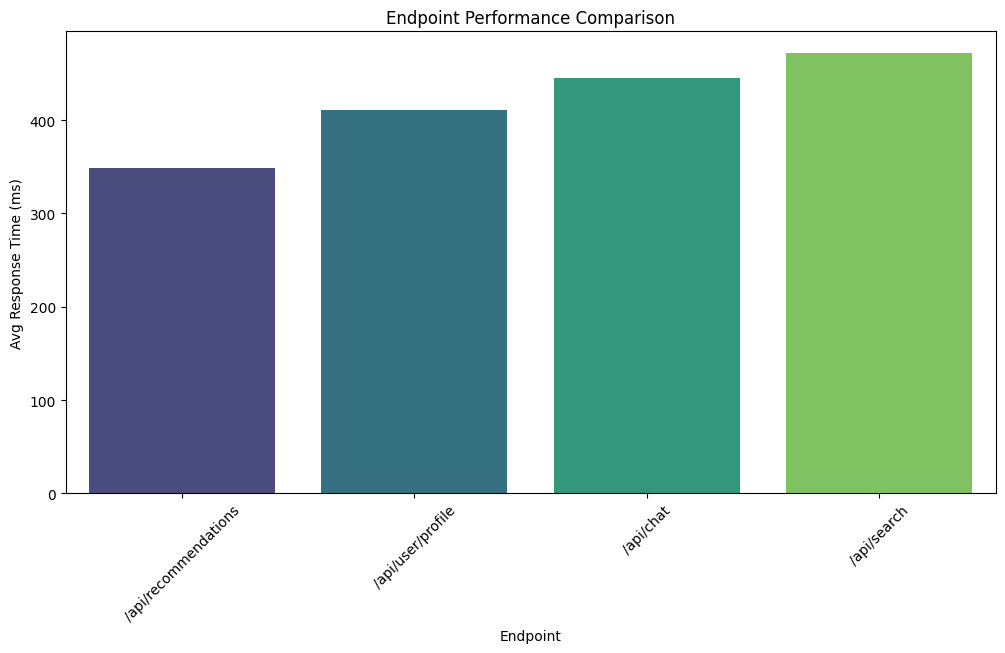

In [ ]:
import seaborn as sns

# Group by endpoint
endpoint_performance = data.groupby('endpoint')['response_time_ms'].mean().sort_values()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=endpoint_performance.index, y=endpoint_performance.values, palette='viridis')
plt.title("Endpoint Performance Comparison")
plt.xlabel("Endpoint")
plt.ylabel("Avg Response Time (ms)")
plt.xticks(rotation=45)
plt.show()


<ipython-input-12-2128025748b3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=endpoint_performance.index, y=endpoint_performance.values, palette='viridis')


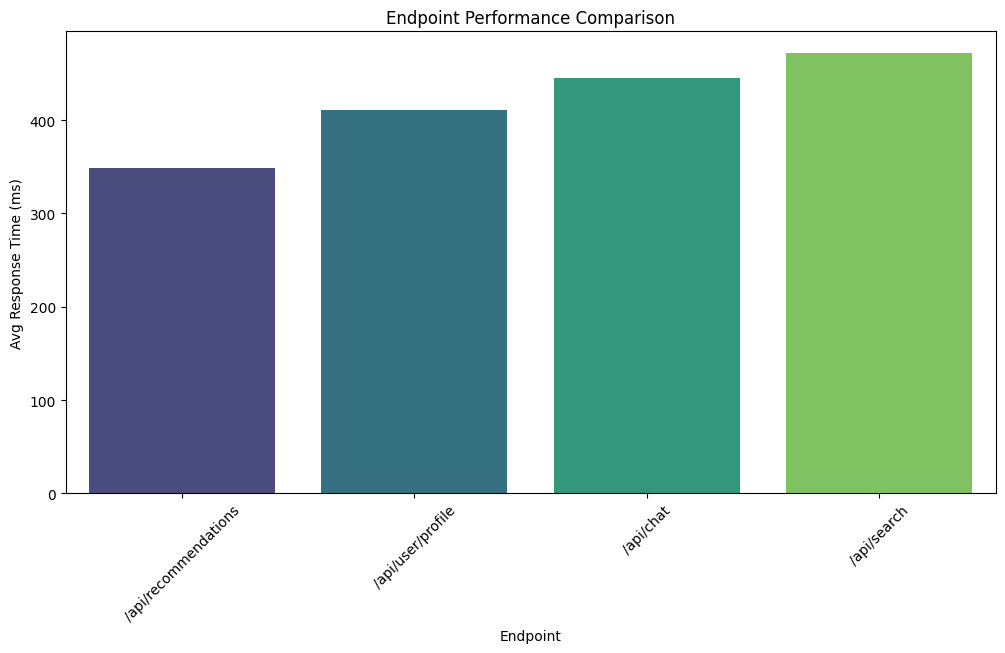

In [ ]:
import seaborn as sns

# Group by endpoint
endpoint_performance = data.groupby('endpoint')['response_time_ms'].mean().sort_values()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=endpoint_performance.index, y=endpoint_performance.values, palette='viridis')
plt.title("Endpoint Performance Comparison")
plt.xlabel("Endpoint")
plt.ylabel("Avg Response Time (ms)")
plt.xticks(rotation=45)
plt.show()


<ipython-input-11-186403596306>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  error_rate = data.resample('H', on='timestamp')['is_error'].mean() * 100


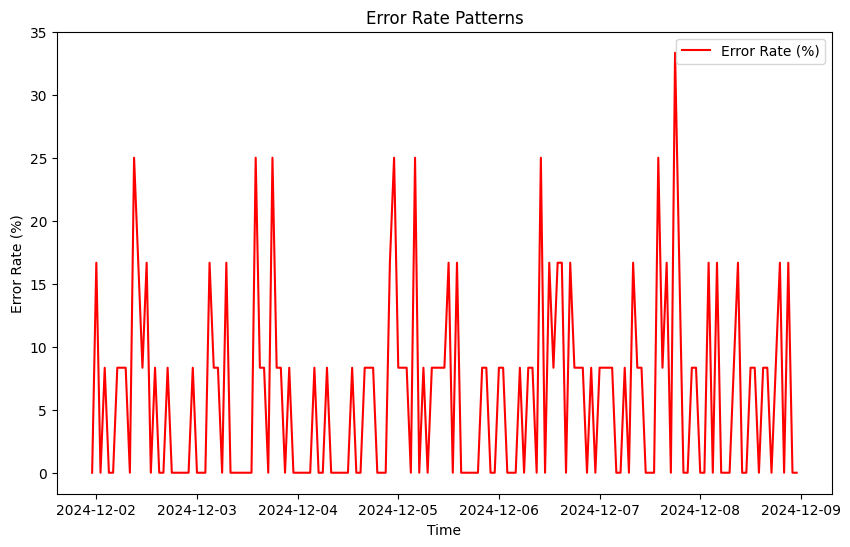

In [ ]:
# Calculate error rate by time
error_rate = data.resample('H', on='timestamp')['is_error'].mean() * 100

# Plot error rate trends
plt.figure(figsize=(10, 6))
plt.plot(error_rate, label='Error Rate (%)', color='red')
plt.title("Error Rate Patterns")
plt.xlabel("Time")
plt.ylabel("Error Rate (%)")
plt.legend()
plt.show()


<ipython-input-10-c8814add6be1>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  response_trends = data.resample('H', on='timestamp')['response_time_ms'].mean()


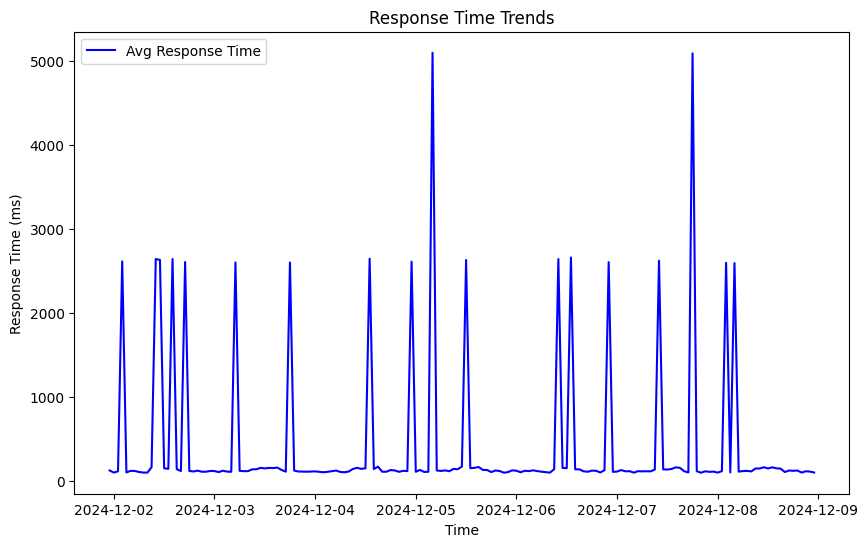

In [ ]:
import matplotlib.pyplot as plt

# Group by hourly intervals
response_trends = data.resample('H', on='timestamp')['response_time_ms'].mean()

# Plot response trends
plt.figure(figsize=(10, 6))
plt.plot(response_trends, label='Avg Response Time', color='blue')
plt.title("Response Time Trends")
plt.xlabel("Time")
plt.ylabel("Response Time (ms)")
plt.legend()
plt.show()


In [ ]:
data['is_error'] = data['status_code'] != 200


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if applicable)
data.dropna(inplace=True)


timestamp           0
endpoint            0
user_id             0
response_time_ms    0
status_code         0
dtype: int64


In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])


In [ ]:
import pandas as pd

# Load the dataset
file_path = "app_logs.xlsx"  # Replace with the actual file path
data = pd.read_excel(file_path)

# Preview the data
print(data.head())
print(data.info())


            timestamp              endpoint  user_id  response_time_ms  \
0 2024-12-01 23:20:31           /api/search  user_25                98   
1 2024-12-01 23:25:31  /api/recommendations  user_82               107   
2 2024-12-01 23:30:31             /api/chat  user_89               147   
3 2024-12-01 23:35:31           /api/search  user_12                96   
4 2024-12-01 23:40:31           /api/search  user_15                98   

   status_code  
0          200  
1          200  
2          200  
3          200  
4          200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         2016 non-null   datetime64[ns]
 1   endpoint          2016 non-null   object        
 2   user_id           2016 non-null   object        
 3   response_time_ms  2016 non-null   int64         
 4   status_code       

In [ ]:
pip install pandas matplotlib seaborn plotly


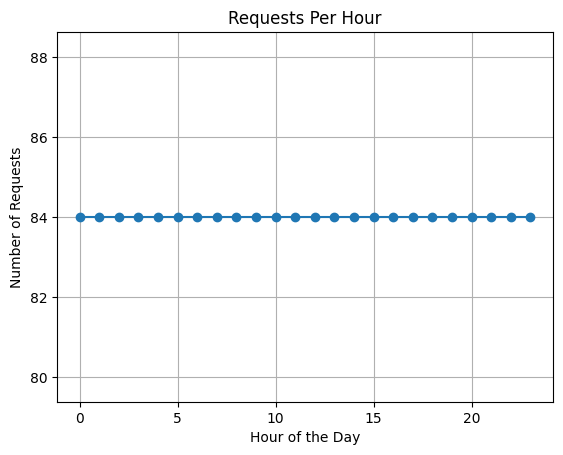

In [ ]:
peak_usage.plot(kind='line', marker='o')
plt.title('Requests Per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.grid()
plt.show()


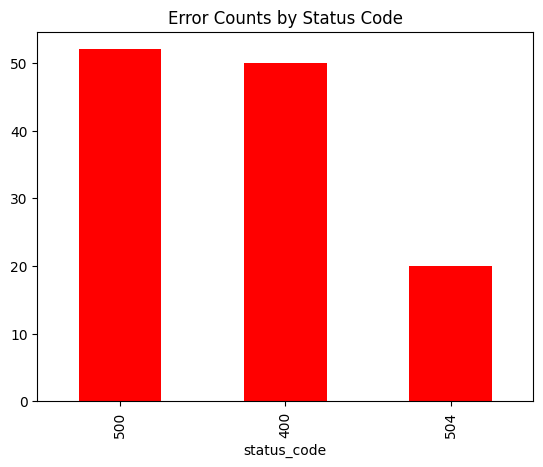

In [ ]:
error_counts.plot(kind='bar', color='red')
plt.title('Error Counts by Status Code')
plt.show()


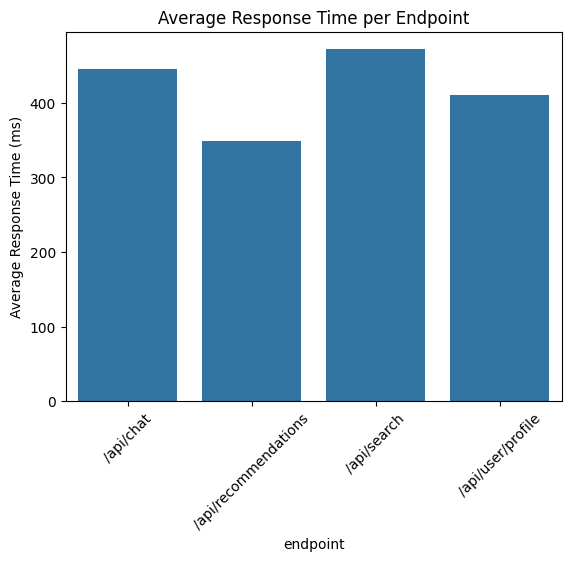

In [ ]:
sns.barplot(data=response_metrics, x='endpoint', y='Average Response Time (ms)')
plt.title('Average Response Time per Endpoint')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Calculate percentage of requests with response times > 1 second
slow_requests = (data['response_time_ms'] > 1000).sum()
percentage_slow_requests = (slow_requests / total_requests) * 100

print(f"Percentage of Requests > 1s: {percentage_slow_requests:.2f}%")


Percentage of Requests > 1s: 0.99%


In [ ]:
# Extract hour from the timestamp
data['hour'] = data['timestamp'].dt.hour
peak_usage = data['hour'].value_counts().sort_index()

peak_usage


,count
hour,
0,84
1,84
2,84
3,84
4,84
5,84
6,84
7,84
8,84


In [ ]:
# Count of errors (status codes >= 400)
error_counts = data[data['status_code'] >= 400]['status_code'].value_counts()

# Calculate error rate
total_requests = len(data)
error_rate = (len(data[data['status_code'] >= 400]) / total_requests) * 100

print(f"Error Rate: {error_rate:.2f}%")
error_counts


Error Rate: 6.05%


,count
status_code,
500,52
400,50
504,20


In [ ]:
# Calculate average and P95 response times per endpoint
average_response = data.groupby('endpoint')['response_time_ms'].mean()
p95_response = data.groupby('endpoint')['response_time_ms'].quantile(0.95)

# Combine into a single DataFrame
response_metrics = pd.DataFrame({
    'Average Response Time (ms)': average_response,
    'P95 Response Time (ms)': p95_response
})
response_metrics.reset_index(inplace=True)
response_metrics


,endpoint,Average Response Time (ms),P95 Response Time (ms)
0,/api/chat,445.026515,235.65
1,/api/recommendations,348.311871,155.20
2,/api/search,471.608081,157.90
3,/api/user/profile,410.600806,160.00


In [ ]:
data.info()  # Ensure columns have the correct data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         2016 non-null   datetime64[ns]
 1   endpoint          2016 non-null   object        
 2   user_id           2016 non-null   object        
 3   response_time_ms  2016 non-null   int64         
 4   status_code       2016 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 78.9+ KB


In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])


In [ ]:
data.isnull().sum()  # Check for missing values in each column


,0
timestamp,0
endpoint,0
user_id,0
response_time_ms,0
status_code,0


In [ ]:
import pandas as pd

# Load the Excel file
data = pd.read_excel('app_logs.xlsx')  # Replace with your file name
data.head()  # Display the first few rows


,timestamp,endpoint,user_id,response_time_ms,status_code
0,2024-12-01 23:20:31,/api/search,user_25,98,200
1,2024-12-01 23:25:31,/api/recommendations,user_82,107,200
2,2024-12-01 23:30:31,/api/chat,user_89,147,200
3,2024-12-01 23:35:31,/api/search,user_12,96,200
4,2024-12-01 23:40:31,/api/search,user_15,98,200


In [ ]:
!pip install pandas matplotlib seaborn
